## Analyzing UVES Spectroscopy  

This tutorial follows our real-life data analysis of MN Lup and the code developed below is taken (with only minor modifications) from the code that we used to prepare the publication. The plots that we will develop below appear in very similar form in the article published in ApJ, 771, 1, 70.

The examples below depend on each other and the plots in the last section make use of things calculated in the earlier sections. Thus, if you need to restart your python session in the course of this tutorial, please execute all the code again.

Sourced from: https://learn.astropy.org/tutorials/UVES.html

In [132]:
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline
working_dir_path = pathlib.Path('/home/tkaminski/test/')

In [133]:
from glob import glob
import os

import numpy as np

from astropy.wcs import WCS
from astropy.io import fits

# os.path.join is a platform-independent way to join two directories
globpath = working_dir_path / 'UVES'
print(globpath)
filelist = list(globpath.glob("*.fits"))
filelist.sort()

/home/tkaminski/test/UVES


In [134]:
sp = fits.open(filelist[0])
sp.info()

Filename: /home/tkaminski/test/UVES/r.UVES.2011-08-11T232352.266-A01_0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     611   (42751,)   float32   


In [135]:
header = sp[0].header

wcs = WCS(header)
index = np.arange(header['NAXIS1'])

wavelength = wcs.wcs_pix2world(index[:,np.newaxis], 0)
wavelength.shape
wavelength = wavelength.flatten()
flux = sp[0].data

In [136]:
def read_spec(filename):
    #Read a UVES spectrum from the ESO pipeline
    sp = fits.open(filename)
    header = sp[0].header

    wcs = WCS(header)
    #make index array
    index = np.arange(header['NAXIS1'])

    wavelength = wcs.wcs_pix2world(index[:,np.newaxis], 0)
    wavelength = wavelength.flatten()
    flux = sp[0].data

    date_obs = header['Date-OBS']
    return wavelength, flux, date_obs

In [137]:
def read_setup(filename):
    #Get setup for UVES spectrum from the ESO pipeline
    sp = fits.open(filename)
    header = sp[0].header

    return header['EXPTIME'], header['CRVAL1'], header['HIERARCH ESO INS PATH']

for f in filelist:
    print(read_setup(f))

(1200.0013, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0013, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0011, 3732.05623191818, 'BLUE')
(1200.0013, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0013, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.001, 3732.05623191818, 'BLUE')
(1200.001, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0011, 3732.05623191818, 'BLUE')
(1200.0011, 3732.05623191818, 'BLUE')
(1200.0011, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0011, 3732.05623191818, 'BLUE')
(1200.0013, 3732.05623191818, 'BLUE')
(1200.0013, 3732.05623191818, 'BLUE')
(1200.0013, 3732.05623191818, 'BLUE')


In [138]:
flux = np.zeros((len(filelist), len(wavelength)))
# date comes as string with 23 characters (dtype = 'S23')
date = np.zeros((len(filelist)), dtype = 'U23')

for i, fname in enumerate(filelist):
    w, f, date_obs = read_spec(fname)
    flux[i,:] = f
    date[i] = date_obs

In [139]:
import astropy.units as u
from astropy.constants.si import c, G, M_sun, R_sun

wavelength = wavelength * (1. * u.dimensionless_unscaled+ heliocentric/c)

# Let's define some constants we need for the exercises further down
heliocentric = -23. * u.km/u.s
v_rad = -4.77 * u.km / u.s  # Strassmeier et al. (2005)
R_MN_Lup = 0.9 * R_sun      # Strassmeier et al. (2005)
M_MN_Lup = 0.6 * M_sun      # Strassmeier et al. (2005)
vsini = 74.6 * u.km / u.s   # Strassmeier et al. (2005)
period = 0.439 * u.day      # Strassmeier et al. (2005)

inclination = 45. * u.degree # Strassmeier et al. (2005)
incl = inclination.to(u.radian)
waveclosetoHa = np.array([6562.,6563,6565.]) * u.AA

In [140]:
# This function uses the Doppler equivalency between wavelength and velocity
import astropy.units as u
def wave2doppler(w, w0):
    w0_equiv = u.doppler_optical(w0)
    w_equiv = w.to(u.km/u.s, equivalencies=w0_equiv)
    return w_equiv

print(wave2doppler(waveclosetoHa, 656.489 * u.nm).to(u.km/u.s))

[-131.9748242   -86.30879506    5.0232632 ] km / s


In [141]:
def w2vsini(wavelength_array, wavelength_line):
    return array_of_shifts_in_vsini
def w2vsini(w, w0):
    v = wave2doppler(w, w0) - 4.77 * u.km/u.s
    return v / vsini

In [142]:
from astropy.time import Time
t1 = Time(header['MJD-Obs'], format = 'mjd', scale = 'utc')
t2 = Time(header['Date-Obs'], scale = 'utc')

delta_lam = np.diff(wcaII.to(u.AA).value)
obs_times = Time(date, scale = 'utc')
delta_t = obs_times - Time(date[0], scale = 'utc')
delta_p = delta_t.value * u.day / period

In [ ]:
def region_around_line(w, flux, cont):
    indcont = ((w > cont[0][0]) & (w < cont[0][1])) |((w > cont[1][0]) & (w < cont[1][1]))
    indrange = (w > cont[0][0]) & (w < cont[1][1])
    f = np.zeros((flux.shape[0], indrange.sum()))
    for i in range(flux.shape[0]):
        # fit polynomial of second order to the continuum region
        linecoeff = np.polyfit(w[indcont], flux[i, indcont], 2)
        f[i,:] = flux[i,indrange] / np.polyval(linecoeff, w[indrange].value)
    return w[indrange], f

wcaII, fcaII = region_around_line(wavelength, flux,
    [[3925*u.AA, 3930*u.AA],[3938*u.AA, 3945*u.AA]])

x = w2vsini(wcaII, 393.366 * u.nm).decompose()

In [144]:
ew = fcaII[0,:] - 1.
ew = ew[:-1] * np.diff(wcaII.to(u.AA).value)
print(ew.sum())

20.790391558375607


In [145]:
ew = np.sum((fcaII - 1.)[:,:-1] * delta_lam[np.newaxis, :], axis=1)
from astropy.table import Column, Table
from astropy.io import ascii

datecol = Column(name = 'Obs Date', data = date)
pcol = Column(name = 'phase', data = delta_p, format = '{:.1f}')
ewcol = Column(name = 'EW', data = ew, format = '{:.1f}', unit = '\\AA')
tab = Table((datecol, pcol, ewcol))
# latexdicts['AA'] contains the style specifics for A&A (\hline etc.)
tab.write(os.path.join(working_dir_path, 'EWtab.tex'), latexdict = ascii.latexdicts['AA'], overwrite=True)

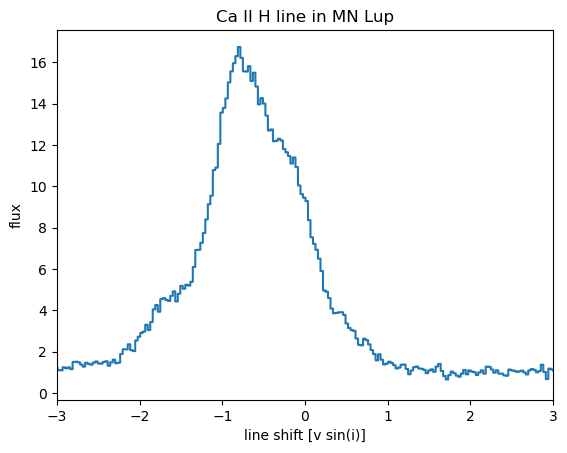

In [148]:
# set reasonable figsize for 1-column figures
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, fcaII[0,:], marker='', drawstyle='steps-mid')
ax.set_xlim([-3,+3])
ax.set_xlabel('line shift [v sin(i)]')
ax.set_ylabel('flux')
ax.set_title('Ca II H line in MN Lup')
# when using this interface, we need to explicitly call the draw routine
plt.show()

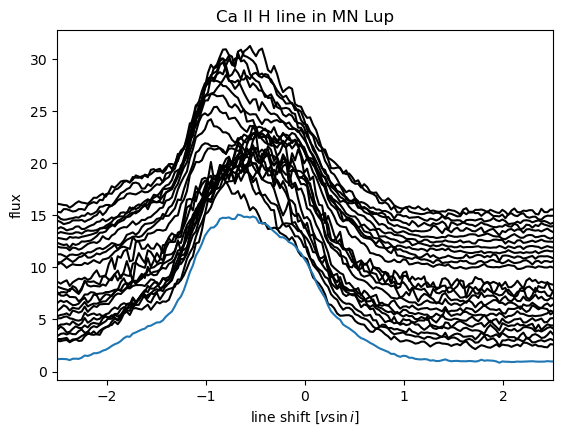

In [149]:
yshift = np.arange((fcaII.shape[0])) * 0.5
yshift[:] += 1.5
yshift[13:] += 1

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for i in range(25):
    ax.plot(x, fcaII[i,:]+yshift[i], 'k')

#separately show the mean line profile in a different color
ax.plot(x, np.mean(fcaII, axis =0))
ax.set_xlim([-2.5,+2.5])
ax.set_xlabel('line shift [$v \\sin i$]')
ax.set_ylabel('flux')
ax.set_title('Ca II H line in MN Lup')
fig.subplots_adjust(bottom = 0.15)
plt.show()